# Part II - (Presentation Title)
## by Zeyad Khaled Abouelyazid Elbosttamy Hammad

## Investigation Overview

who are the most dependent categories on bikes in San Francisco? How do stations appear on map? what is the distribution of distance covered by riders?
The biggest market is Make adult then female adult who are between 30 and 45 years males and females
there main four places where station are concentrated
The range of distance covered by bike is 4650 m and IQR is 1364 m and the mean is 1761 m and the median is 1554 m
The arrangement of market from greatest to lowest are the male subscribers, female subscribers then male customers 


## Dataset Overview and Executive Summary

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco


In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("C:\\Users\\Al-arab\\Desktop\\Deci project\\201902-fordgobike-tripdata.csv")

## (Visualization 1)

> Which categories are dependently on bikes in San Fransisco 
> The arrangement of market from greatest to lowest are the male subscribers, female subscribers then male customers 


Text(50.72222222222221, 0.5, 'User type')

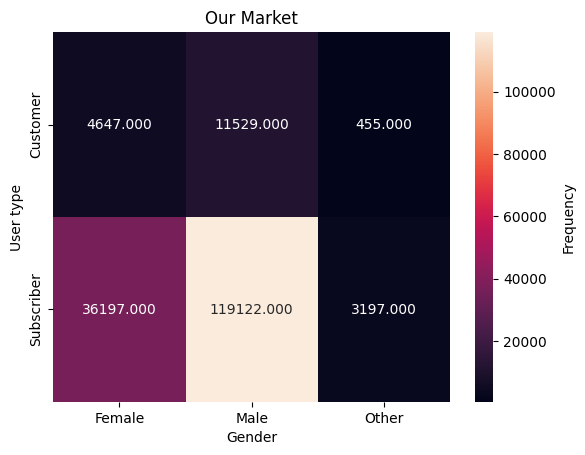

In [18]:
pivot = df.groupby(["user_type"]).value_counts(["member_gender"]).reset_index().rename(columns= {0:"Frequency"})
pivot = pivot.pivot(index='user_type', columns='member_gender', values='Frequency')
sns.heatmap(pivot, annot=True, fmt='.3f',cbar_kws = {'label' : 'Frequency'})
plt.title("Our Market")
plt.xlabel("Gender")
plt.ylabel("User type")

The arrangement of market from greatest to lowest are the male subscribers, female subscribers then male customers. This plot here is heat map divided into 6 pieces as gender vs user type
so may be we need to make more advertisements to increase number of male subscribers as it is the biggest market can we see the market by anothe way ? next visualization will help.

## (Visualization 2)

> what is the demography of users of our bikes ? which category should San Fransico focus on?
> we found that The biggest market is Make adult then female adultwho are between 30 and 45 years males and females

Text(50.722222222222214, 0.5, 'Gender')

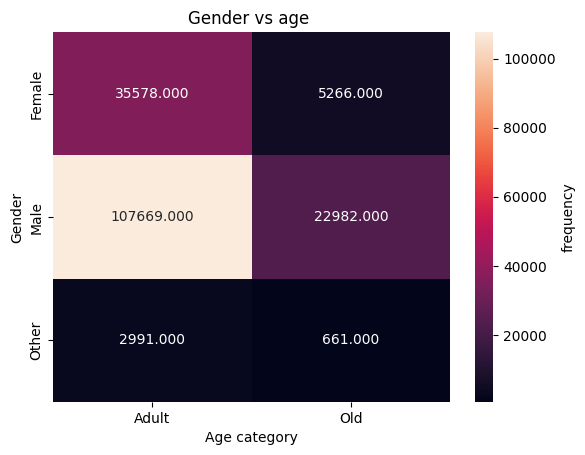

In [19]:
df["age"] = 2025 - df["member_birth_year"]
user = []
for x in df["age"]:
    if x < 12:
        user.append("Kid")
    elif x > 12 and  x < 18:
        user.append("Teenager") 
    elif x < 50 and x > 18:
        user.append("Adult") 
    else:
        user.append("Old") 
df["user"] = user
pivot = df.groupby(["member_gender"]).value_counts(["user"]).reset_index().rename(columns= {0:"Frequency"})
pivot = pivot.pivot(index='member_gender', columns='user', values='Frequency')
sns.heatmap(pivot, annot=True, fmt='.3f',cbar_kws = {'label' : 'frequency'})
plt.title("Gender vs age ")
plt.xlabel("Age category")
plt.ylabel("Gender")

we can see that the biggest customer for our bikes are the male Adults then female adults so may be we must increase our focus on adults.
As the plot shown here is heatmap divided into 6 pieces User age ctegorically vs Gender. can we see market by different point of view?

Text(50.722222222222214, 0.5, 'Gender')

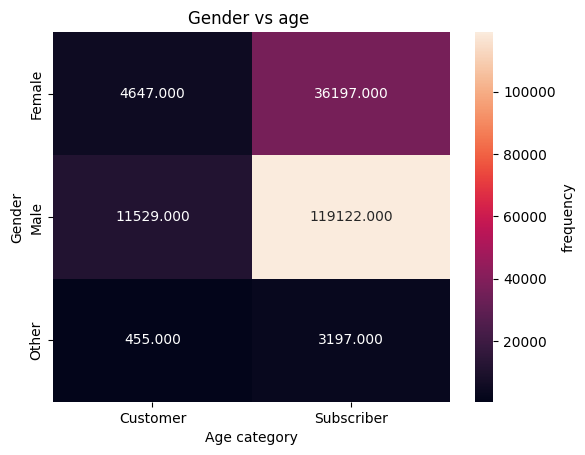

In [20]:
pivot = df.groupby(["member_gender"]).value_counts(["user_type"]).reset_index().rename(columns= {0:"Frequency"})
pivot = pivot.pivot(index='member_gender', columns='user_type', values='Frequency')
sns.heatmap(pivot, annot=True, fmt='.3f',cbar_kws = {'label' : 'frequency'})
plt.title("Gender vs age ")
plt.xlabel("Age category")
plt.ylabel("Gender")

From here we can find that biggest market is Male subscribers then Female subscribers but what is the distribution of distances our market cut?

## visulaization 3
> Did uers use the bikes for long trip? what is the average distance cut by bikes?
> The range of distance covered by bike is 4650 m and IQR is 1364 m and the mean is 1761 m and the median is 1554 m
> it means that most of people ride bike to cover distance from 600 meters to 1600 meters


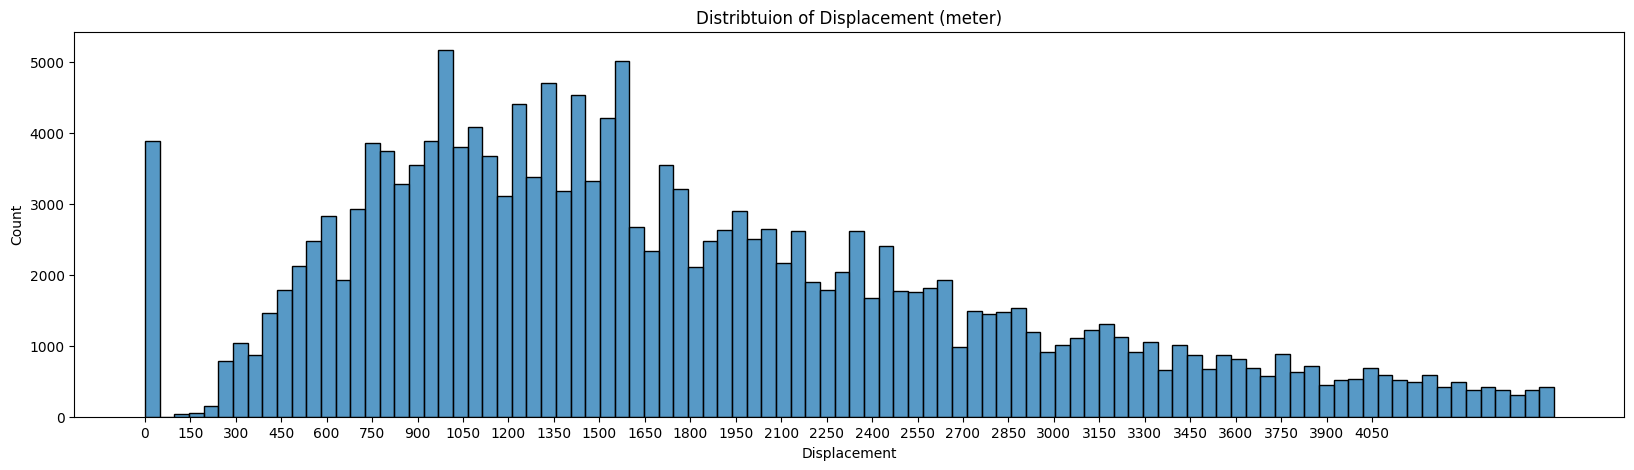

In [21]:
def remove_outliers(data, column):
    """
    Identifies outliers in a numerical column based on the IQR method.
    """
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    not_outlier = data[(data[column] >=lower_bound) & (data[column] <= upper_bound)]
    return not_outlier

ticks = np.arange(0 , 4000 + 150 , 150)
x= np.absolute(df["end_station_latitude"] - df["start_station_latitude"])
y = np.absolute(df["end_station_longitude"] - df["start_station_longitude"])
df["Displacement"] =  np.sqrt(x**2 + y**2) * 111000 # Each degree of latitude and longtitudinal is approximately 69 miles (111 kilometers) apart.
distance = remove_outliers(df ,"Displacement")
plt.figure(figsize=(20, 5))
sns.histplot(data = distance ,x= "Displacement");
plt.title("Distribtuion of Displacement (meter)")
plt.xticks(ticks);


we found that most of bikes are roden from 700 to 1600 m why are these distance like that what are places of stations?


## visualization 4
> How many main place are stations loacated on?
> there are 4 main places where stations are located on.
> that means we can distribute stations much widely  

Text(0.5, 1.0, 'cordinates of stations')

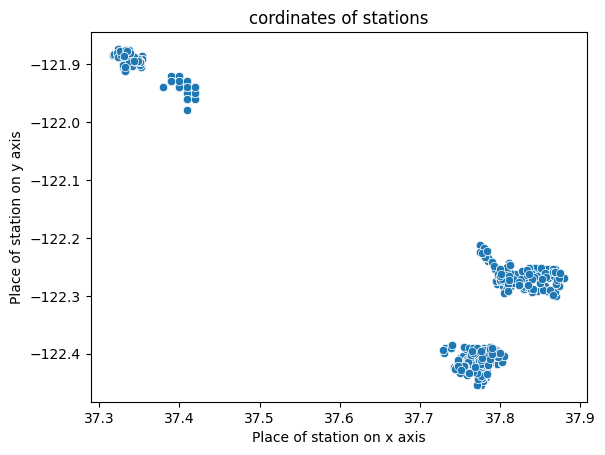

In [22]:
sns.scatterplot(data = df , x = "start_station_latitude" , y ="start_station_longitude")
plt.title("Place of stations on map")
plt.xlabel("Place of station on x axis")
plt.ylabel("Place of station on y axis")
plt.title("cordinates of stations")

I recommend to increase distribution of stations widely and they are concentrated in only 4 places